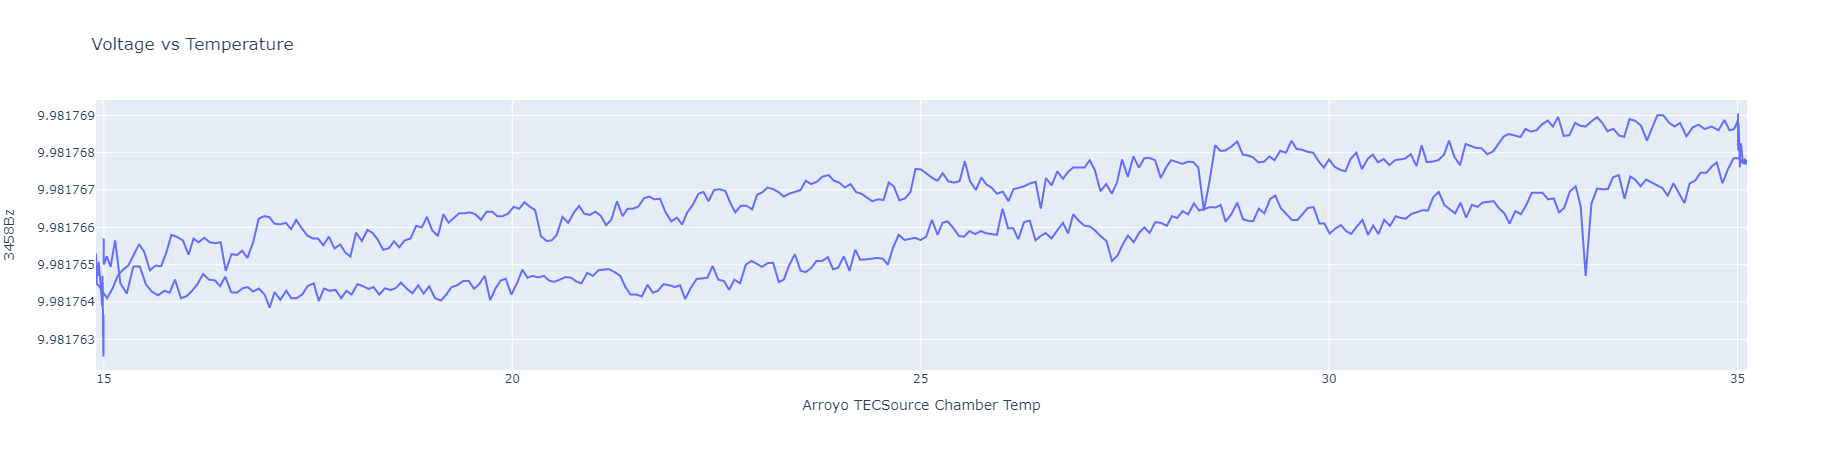

In [9]:
import pandas as pd
import plotly.express as px

# Fetch data
columns = ["Time", "Arroyo TECSource Chamber Temp", "3458Bz"]
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/20230117-162935_ADRmu7_15_35_TC_sweep.csv", usecols=columns)

# Use datetime as index
raw["Time"] = pd.to_datetime(raw["Time"])
raw = raw.set_index(pd.DatetimeIndex(raw["Time"]))
raw = raw.drop('Time', axis=1)

raw=raw.resample('10s').mean()
fig = px.line(raw, x = 'Arroyo TECSource Chamber Temp', y = '3458Bz', title='Voltage vs Temperature')
fig.show()